In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data = pd.read_csv('student.csv')
print(data.shape)
data.head()


(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


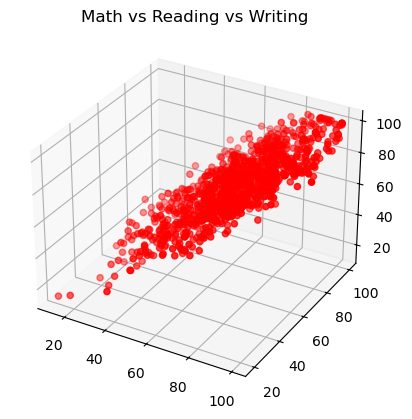

In [9]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data['Math'], data['Reading'], data['Writing'], color='red')
plt.title('Math vs Reading vs Writing')
plt.show()

In [10]:
m=len(math)
x0=np.ones(m)
X=np.array([x0,math,read]).T
Y = np.array(write)
B = np.array([0, 0, 0])    
alpha = 0.0001          


In [11]:
def cost_function(X,Y,B):
    m=len(Y)
    j=np.sum((X.dot(B)-Y)**2)/2*m
    return j
initial_cost = cost_function(X, Y, B)
print("Initial Cost:", initial_cost)



Initial Cost: 2470110000.0


In [16]:
def gradient_descent(X,Y,B,alpha,iterations):
    cost_history=[0]*iterations
    m=len(Y)
    for iteration in range(iterations):
            h=X.dot(B)
            loss=h-Y
            gardient=X.T.dot(loss)/m
            B=B-alpha*gardient
            cost=cost_function(X,Y,B)
            cost_history[iteration]=cost
    return B,cost_history
    

In [17]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)
print("New Coefficients (b0, b1, b2):", newB)


New Coefficients (b0, b1, b2): [-0.47889172  0.09137252  0.90144884]


In [18]:
final_cost = cost_function(X, Y, newB)
print("Final Cost:", final_cost)


Final Cost: 10475123.473539166


In [21]:
Y_pred = X.dot(newB)
mean_y = np.mean(Y)
ss_tot = np.sum((Y - mean_y)**2)
ss_res = np.sum((Y - Y_pred)**2)
r2 = 1 - (ss_res / ss_tot)
print("R² Score:", r2)

R² Score: 0.9097223273061552
